# Numerical Implementation of Delta Hedging Using Caliberated Heston Model

#### $\Large\cdot$ Mathematical Interpretation
##### $\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\Large\cdot$ Construction of Market Price of Risk
##### $\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\Large\cdot$ Derivation of Heston Model
#### $\Large\cdot$ Implementation of Heston Model in Vanilla Option Pricing
##### $\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\Large\cdot$ Direct Integration
##### $\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\Large\cdot$ Cosine Tranformation Method
##### $\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\Large\cdot$ Result Verification
#### $\Large\cdot$ Parameter Calibration
##### $\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\Large\cdot$ Loss Function Definition
##### $\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\Large\cdot$ Levenberg-Marquardt Optimization
##### $\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\Large\cdot$ QuantLib Optimization

## Mathematical Interpretation

### Market Price of Risk

Before the articulation of how the Heston Model is derived, an introduction shall be made on th derivation of the valueation equation.

Suppose that the stock price $S$ and its variance $v$ satisfy the following:
$$dS_t = \mu_tS_tdt + \sqrt{v_t}S_tdZ_1$$
$$dv_t = \alpha(S_t, v_t, t)dt + \eta\beta(S_t, v_t, t)\sqrt{v_t}dZ_2$$
with
$$\langle dZ_1 dZ_2 \rangle = \rho dt$$
where $\mu_t$ is the (deterministic) instantaneous drift of stock price returns, $\eta$ is the volatility of volatility and $\rho$ is the correlation between random stock price returns and changes in $v_t$. $dZ_1$ and $dZ_2$ are Wiener processes.

In the Black-Scohles model, the only randomness considered is the stock price, which explains why a percentage of underlying asset should be involved in constructing a hedging portfolio. However, in this case, since the changes in volatility also need to be hedged, we shall set up the portfolio $\Pi$ as 
$$\Pi = V - \Delta S - \Delta_1 V_1$$
where the option is priced as $V(S,v,t)$ and a quantity $-\Delta$ of the stock with a quantity $-\Delta_1$ of another asset whose value $V_1$ depends on volatility are also involved.

With Ito's Formula, the change in this portfolio in a time $dt$ is given by 
$$d\Pi = \{\frac{\partial V}{\partial t} + \frac{1}{2}vS^2\frac{\partial^2 V}{\partial S^2} + \rho \eta v \beta S \frac{\partial^2 V}{\partial v \partial S} + \frac{1}{2}\eta^2 v \beta^2\frac{\partial^2 V}{\partial v^2} \} dt$$
$$-\delta_1 \{\frac{\partial V_1}{\partial t} + \frac{1}{2}vS^2\frac{\partial^2 V_1}{\partial S^2} + \rho \eta v \beta S \frac{\partial^2 V_1}{\partial v \partial S} + \frac{1}{2}\eta^2 v \beta^2\frac{\partial^2 V_1}{\partial v^2} \} dt$$
$$+ \{ \frac{\partial V}{\partial S} - \Delta_1 \frac{\partial V_1}{\partial S} - \Delta \} dS$$
$$+\{\frac{\partial V}{\partial S} - \Delta_1 \frac{\partial V_1}{\partial v}\} dv$$

To make the portfolio risk-free instantaneously, we must choose 
$$\frac{\partial V}{\partial S} - \Delta_1 \frac{\partial V_1}{\partial S} - \Delta = 0$$
$$\frac{\partial V}{\partial S} - \Delta_1 \frac{\partial V_1}{\partial v} = 0$$
to eliminate $dS$ and $dv$ terms.

So, we have
$$\Delta_2 = \frac{\partial V / \partial Y}{\partial V_1 / \partial Y}$$
$$\Delta_1 = \frac{\partial V}{\partial S} - \left(\frac{\partial V / \partial Y}{\partial V_1 / \partial Y} \right) \frac{\partial V_1}{\partial S}$$

To make $d\prod_t$ risk-free, we have 
$$d\Pi = r\Pi dt = r\left( vV - \Delta S - \Delta_1 V_{1} \right) dt$$

Collecting all $V$ terms on the left-hand side and all $V_1$ terms on the right hande side, we get
$$[\frac{\partial V}{\partial t} + \frac{1}{2}vS^2\frac{\partial^2 V}{\partial S^2} + \rho \eta v \beta S \frac{\partial^2 V}{\partial v \partial S} + \frac{1}{2}\eta^2 v \beta^2\frac{\partial^2 V}{\partial v^2} + rS\frac{\partial V}{\partial S} - rV] / [\frac{\partial V}{\partial v}]$$
$$=[\frac{\partial V_1}{\partial t} + \frac{1}{2}vS^2\frac{\partial^2 V_1}{\partial S^2} + \rho \eta v \beta S \frac{\partial^2 V_1}{\partial v \partial S} + \frac{1}{2}\eta^2 v \beta^2\frac{\partial^2 V_1}{\partial v^2} + rS\frac{\partial V_1}{\partial S} - rV_1] / [\frac{\partial V_1}{\partial v}]\,\,\,\,\,\,\,\,\,(1)$$

Since the LHS is a function $f$ of $V$ only and the RHS is a function $f$ of $V_1$ only, we regard such equality as a function solely depends on variables $S,Y,t$. Denoting function $f$ as 
$$-(\alpha - \phi \beta \sqrt{v}) \frac{\partial V}{\partial v}\,\,\,\,\,\,\,\,\,(2)$$

This makes an equality between the LHS of (1) and (2)
$$\frac{\partial V}{\partial t} + \frac{1}{2}vS^2\frac{\partial^2 V}{\partial S^2} + \rho \eta v \beta S \frac{\partial^2 V}{\partial v \partial S} + \frac{1}{2}\eta^2 v \beta^2\frac{\partial^2 V}{\partial v^2} + rS\frac{\partial V}{\partial S} + (\alpha - \phi \beta \sqrt{v}) \frac{\partial V}{\partial Y} - rV = 0\,\,\,\,\,\,\,\,\,(3)$$
where we have express the function $f$ as $(\alpha - \phi \beta \sqrt{v})$ and $\alpha$ and $\beta$ represents the drift and volatility respectively. Meanwhile, $\phi$ denotes the market price of volatility.

### Derivation of Heston Model

The Heston model give such assumptions $\alpha(S,v_t,t) = \kappa(\theta - v_t)$ and $\beta(S,v,t)=1$ for the movement
$$dS_t = \mu_tS_tdt + \sqrt{v_t}S_tdZ_1$$
$$dv_t = \alpha(S_t, v_t, t)dt + \sigma\beta(S_t, v_t, t)\sqrt{v_t}dZ_2$$
(Notice the notational change $\eta \rightarrow \sigma$ for better articulation)

These equations then become
$$dS_t = \mu_tS_tdt + \sqrt{v_t}S_tdZ_1$$
$$dv_t = \kappa(\theta - v_t) dt + \sigma\sqrt{v_t}dZ_2$$

where $\lambda$ is the speed of reversion of $v_t$ to its long-term mean $\overline{v}$

This gives us
$$\frac{\partial V}{\partial t} + \frac{1}{2}vS^2\frac{\partial^2 V}{\partial S^2} + \rho \eta v S \frac{\partial^2 V}{\partial v \partial S} + \frac{1}{2}\eta^2 v \beta^2\frac{\partial^2 V}{\partial v^2} + rS\frac{\partial V}{\partial S} - rV = [\kappa(\theta - v_t) - \lambda] \frac{\partial V}{\partial v}\,\,\,\,\,\,\,\,\,(4)$$
where $(\alpha - \phi \beta \sqrt{v}) = [\kappa(\theta - v_t) - \phi v_t]$

By analogy with the Black-Scholes formula, Heston guessed a solution of the form
$$V(S, v, t) = SP_1 - KP(t, T)P_2$$
where the first term is the present value of the spot asset upon optimal
exercise, and the second term is the present value of the strike-price
payment. 
Both of these terms must satisfy the equation for asset valuation (4). It is
convenient to write them in terms of the logarithm of the spot price
$$x = ln[S]\,\,\,\,\,\,\,\,\partial x = \partial (ln[S]) = \frac{\partial S}{S}$$

The probabilities $P_j$ are not immediately available in closed form. However, their characteristic function solutions have the form $(\tau = T - t)$
$$f_j(x, v, t; \phi) = exp\{C(T-t, \phi) + D(T - t; \phi) v + i\phi x\}$$
with terminal conditions
$$f_j(x, v, T; \phi) = exp\{i\phi x\}$$
where 
$$C(\tau;\phi) = r\phi i \tau + \frac{a}{\sigma^2} \bigg\{ (b_j - \rho\sigma\phi i + d)\tau - 2ln \left[ \frac{1 - ge^{d\tau}}{1-g} \right] \bigg\}$$
$$D(\tau;\phi) = \frac{b_j - \rho\sigma\phi i + d}{\sigma^2}\left[ \frac{1 - e^{d\tau}}{1-ge^{d\tau}} \right]$$
and 
$$g = \frac{b_j - \rho\sigma\phi i + d}{b_j - \rho\sigma\phi i - d}$$
$$d = \sqrt{(\rho\sigma\phi i - b_j)^2 - \sigma^2(2u_j\phi i - \phi^2)}$$

for $j = 1,2$, where
$$u_1 = \frac{1}{2}, u_2 = -\frac{1}{2}, a = \kappa\theta, b_1 = \kappa + \lambda - \rho \sigma, b_2 = \kappa + \lambda$$

## Implementation of Heston Model in Vanilla Option Pricing

In [625]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import numba
import seaborn as sns
sns.set_style('darkgrid')
import pandas as pd
import scipy.stats as stats
from scipy.stats import norm
from scipy.integrate import quad
from scipy.optimize import minimize,least_squares
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy.polynomial.legendre as gl
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns',10)
pd.set_option('display.max_rows',10)
i = complex(0,1)

In [304]:
ticker = "AAPL"
stockData = yf.Ticker(ticker).history(period="max")  

logReturn = np.log(stockData['Close'] / stockData['Close'].shift(1))
logReturn.dropna(inplace=True)  # Removing NaN values that arise from the shift operation

# Annualize statistics
tradingDaysCount = 252
annualisedMean = np.mean(logReturn) * tradingDaysCount
annualisedVariance = np.var(logReturn) * tradingDaysCount
annualisedStdDev = np.sqrt(annualisedVariance)
lastPrice = stockData['Close'].iloc[-1]

print("Annualised Mean Return:", annualisedMean)
print("Annualised Variance:", annualisedVariance)
print("Annualised Standard Deviation:", annualisedStdDev)
print("Last Closing Price:", lastPrice)

Annualised Mean Return: 0.17657612556087468
Annualised Variance: 0.20185702569415723
Annualised Standard Deviation: 0.44928501610242605
Last Closing Price: 221.27000427246094


For the range of strike prices we decided to use a percentage of 20% around the current stock price to have a sample of in-the-money, at-the-money and out-of-the-money options to price.

### Direct Integration

In [612]:
S0 = 209.82 # Initial asset price
mins = int(S0 * 0.8)
maxs = int(S0 * 1.2)
K = np.arange(mins, maxs) # Strike Price Range
K0 = 230 # Sample Strike Price
v0 = 0.44 # Initial Volatility
r = 0 # Risk-Free Rate
q = 0.00 # Dividend Payment
mu = r - q # Mean Rate of Return

kappa = 1.5768 # rate of mean reversion of variance process (preset)
theta = 0.202 # long-term mean variance
sigma = 0.57 # volatility of volatility
lamda = 0 # risk premium of variance
rho = -0.57 # Correlation Between Variance and Stock Process
T = 30 / 365  # time to maturity
F = S0*np.exp((mu)*T)  # Forward Price

L = 120
N = 15
k = np.arange(np.power(2, N))

#### Characteristic Function
Definition of the corresponding characteristic functions are given above for $j=1, 2$

In [613]:
def char_function(phi, S0, v0, kappa, theta, rho, sigma, lamda, r, T, j):  
    if j == 1 :
        u = 0.5
        b = kappa + lamda - rho*sigma
    elif j == 2:
        u = -0.5
        b = kappa + lamda
    else:
        raise ValueError("j should be 1 or 2")
    X = np.log(S0)  
    rspi = rho*sigma*phi*i  
    
    d = np.sqrt( (rspi-b)**2 - sigma**2 * (2*u*phi*i-phi**2) )
    g = (b - rspi + d) / (b - rspi - d)
    a = kappa * theta
    
    C = r*phi*i*T + a/sigma**2 * ((b-rspi+d)*T - 2*np.log((1-g*np.exp(d*T))/(1-g)))
    D = (b - rspi + d)/sigma**2 * ( (1-np.exp(d*T)) / (1-g*np.exp(d*T)) )
    func = np.exp(C + D*v0 + i*phi*X)
    return func

def integral_function(phi, S0, v0, kappa, theta, rho, sigma, lamda, r, T, j, K):
    i = complex(0, 1)
    numerator = (np.exp(-i*phi*np.log(K)) * 
                char_function(phi, S0, v0, kappa, theta, rho, sigma, lamda, r, T, j))
    denominator = (i*phi)
    integral = numerator / denominator
    return integral


def Heston_price(S0, v0, kappa, theta, rho, sigma, lamda, r, T, K, CP_flag):
    args1 = (S0,v0,kappa,theta,rho,sigma,lamda,r,T,1,K)
    args2 = (S0,v0,kappa,theta,rho,sigma,lamda,r,T,2,K)
    # The following integrand graph indicates a proper upper bound of the integration 
    # around which the integral converges
    P1,err = 0.5 + 1/(np.pi) * np.real(quad(integral_function,0,100,args = args1))
    P2,err = 0.5 + 1/(np.pi) * np.real(quad(integral_function,0,100,args = args2))
    
    call_price = S0 * P1 - K * np.exp(-r*T)*P2
    put_price = call_price - S0 + np.exp(-r*T)*K 
    
    value = call_price - CP_flag * (call_price - put_price)  
    return value

To determine the upper bound of the integration, we select the frequency factor $phi$ of which the integrand converges to zero

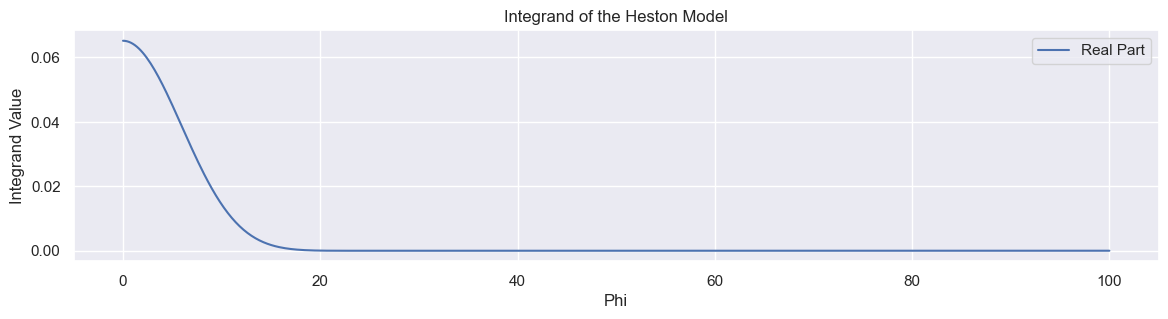

In [624]:
def plot_integrand(S0, v0, kappa, theta, rho, sigma, lamda, r, T, K, j):
    # Range of phi values from 0.01 to 100, avoiding division by zero at phi=0
    phis = np.linspace(0.01, 100, 500)
    integrand_values = [integral_function(phi, S0, v0, kappa, theta, rho, sigma, lamda, r, T, j, K) for phi in phis]

    real_parts = np.real(integrand_values)
    plt.figure(figsize=(14, 3))
    plt.plot(phis, real_parts, label='Real Part')
    plt.title('Integrand of the Heston Model')
    plt.xlabel('Phi')
    plt.ylabel('Integrand Value')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_integrand(S0, v0, kappa, theta, rho, sigma, lamda, r, T, 200, 1)

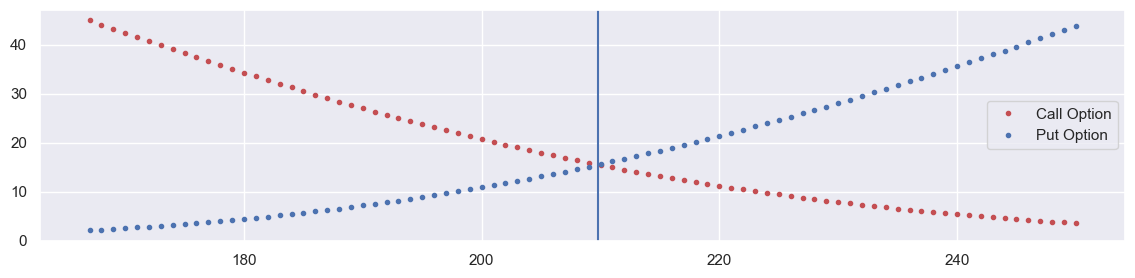

In [469]:
CALL_INT = np.zeros((np.size(K)))
PUT_INT = np.zeros((np.size(K)))
for number in range(0, np.size(K)):
    CALL_INT[number] = Heston_price(S0, v0, kappa, theta, rho, sigma, lamda, r, T, K[number], 0)
    PUT_INT[number] = Heston_price(S0, v0, kappa, theta, rho, sigma, lamda, r, T, K[number], 1)

plt.figure(figsize=(14, 3))
plt.plot(K, CALL_INT, "r.", label='Call Option')
plt.plot(K, PUT_INT, "b.", label='Put Option')
plt.axvline(x = S0)
plt.legend()
plt.show()

### Cosine Transform Method
The pricing of plain vanilla options through Heston Model with direct integration has been completed and it is shown that the price curves with regard to the strike price are well-articulated according to the graph. However, this approach has certain limitations when dealing with varying strike price despite the adoption of loops. Hence, in order to equip the closed-form formula with capability of vector operations, we are looking for an alternative approach. Fortunately, in the work paper by Fang and Oosterle (2008), a novel method is given, the COS, cosine transformation method.

#### Truncation Range

In [309]:
def truncate_range(L, mu, T, v0, theta, kappa, rho, sigma):
    c1 = mu * T + (1 - np.exp(-kappa*T))*(theta - v0)/ (2*kappa) - theta*T / 2
    
    c2 = 1/(8*np.power(kappa,3)) * (sigma*T*kappa*np.exp(-kappa*T)
        *(v0 - theta)*(8*kappa*rho - 4*sigma)
        + kappa*rho*sigma*(1 - np.exp(-kappa*T)) * (16*theta - 8*v0)
        + 2*theta*kappa*T*(-4*kappa*rho*sigma + np.power(sigma,2) + 4*np.power(kappa,2))
        + np.power(sigma,2)*((theta - 2*v0)*np.exp(-2*kappa*T)
        + theta*(6*np.exp(-kappa*T) - 7) + 2*v0)
        + 8*np.power(kappa,2)*(v0 - theta)*(1 - np.exp(-kappa*T)))
    
    a = c1 - L*np.sqrt(np.abs(c2))
    b = c1 + L*np.sqrt(np.abs(c2))
    return a, b

a, b = truncate_range(L, mu, T, v0, theta, kappa, rho, sigma)
bma = b - a
print(f'The upper bound is {a} and the lower bound is {b}')

The upper bound is -22.435033665157057 and the lower bound is 22.400083845246655


#### Cosine Series Expansion

The cosine series coefficiens, $\chi_k$, of $g(y) = e^y$ on $[c,d] \subset [a,b]$,
$$\chi_k(c, d) = \int^d_c e^y cos(k\pi \frac{y-a}{b-a}) dy$$
and the cosine series coefficiens, $\psi_k$, of $g(y) = 1$ on $[c,d] \subset [a,b]$,
$$\psi_k(c, d) = \int^d_c cos(k\pi \frac{y-a}{b-a}) dy$$

As
$$\chi_k(c, d) = \frac{1}{1 + (\frac{k\pi}{b-a})^2} \left[ cos(k\pi\frac{d-a}{b-a})e^d - cos(k\pi\frac{c-a}{b-a})e^c + \frac{k\pi}{b-a} sin(k\pi\frac{d-a}{b-a})e^d - \frac{k\pi}{b-a} sin(k\pi\frac{c-a}{b-a})e^c\right]$$
and
$$\psi(c,d) = \left[sin(k\pi\frac{d-a}{b-a} - sin(k\pi\frac{c-a}{b-a})\right] \frac{b-a}{k\pi}\,\,\,\,k \neq 0$$
$$\psi(c,d) = (d-c)\,\,\,\,k=0$$

In [310]:
def chi(a, b, c, d, k):
    bma = b - a
    uu = (k * np.pi) / bma
    chi = np.multiply(np.divide(1, (1 + np.power(uu, 2))),
                      (np.cos(uu * (d-a)) * np.exp(d) - np.cos(uu*(c-a))*np.exp(c)
                        + np.multiply(uu, np.sin(uu*(d-a)))*np.exp(d)
                        - np.multiply(uu, np.sin(uu*(c-a)))*np.exp(c)))
    return chi


def psi(a, b, c, d, k):
    bma = b - a
    omega = k * np.pi / bma
    omega[0] = 1

    psi = np.divide(1, omega) * (np.sin(omega*(d-a)) - np.sin(omega*(c-a)) )
    psi[0] = d-c
    return psi

#### Summation Coefficients
Coefficient for call and put options are given as
$$U_{k_call} = \frac{2}{b-a}(\chi_k(0, b) - \psi_k(0, b))$$ 
$$U_{k_put} = \frac{2}{b-a}(-\chi_k(a, 0) + \psi_k(a, 0))$$ 
respectively.

In [311]:
UkPut  = 2 / bma * ( psi(a,b,a,0,k) - chi(a,b,a,0,k) )
UkCall = 2 / bma * ( chi(a,b,0,b,k) - psi(a,b,0,b,k) )

#### Characteristic Functions

In [312]:
# To distinguish between different numerical method,
# we define the vriable in frequency as omega instead of phi
def get_COS_char(k, rho, sigma, kappa, mu, T, v0, a, b):
    omega = k * np.pi / (b - a)
    ihs = (1j)*rho*sigma
    
    D = np.sqrt( (kappa - ihs*omega)**2 + (omega**2 + 1j*omega)*(sigma**2) )
    G = (kappa - ihs*omega - D) / (kappa - ihs*omega + D)

    func_pt1 = (1j*omega*mu*T + 
                (v0 / sigma**2) * ( (1 - np.exp(-D*T)) / (1 - G*np.exp(-D*T)) ) * (kappa - ihs*omega - D))
    func_pt2 = np.divide(kappa*theta, sigma**2) * ((kappa - ihs*omega - D)*T - 2*np.log((1 - G*np.exp(-D*T))/(1-G)))
    func = np.exp(func_pt1 + func_pt2)
    return func

To use the Heston model for call option pricing we determined the Put option prices first and calculated the corresponding Call option prices using the Put-Call-Parity. As Call options' payoffs rise with increasing stock price a cancellation error can be introduced when valuing call options. This effect does not occur for Put options.
$$v^{call}(x, t_0) = v^{put}(x, t0) + S_0e^{-qT} - Ke^{-rT}$$

The pricing formula with COS method is thus given by
$$v(x, t_0, u_0) \approx Ke^{-r\Delta t} \cdot \Re \bigg\{ \sum^{N-1}_{k=0}'f_{hes}(\frac{k\pi}{b-a};u_0) U_k \cdot e^{ik\pi\frac{x-a}{b-a}}\bigg\}$$

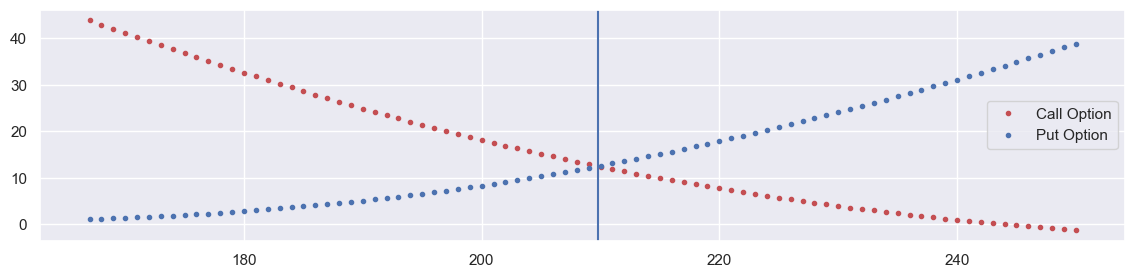

In [470]:
char_functions = get_COS_char(k, rho, sigma, kappa, mu, T, v0, a, b)
CALL_COS = np.zeros((np.size(K)))
PUT_COS = np.zeros((np.size(K)))
CALL_COS_PARITY = np.zeros((np.size(K)))

for num in range(0, np.size(K)): # Looping over the array of log-strike
    x  = np.log(S0 / K[num])
    exp_term = np.exp(1j * k * np.pi * (x-a)/(a-b))
    F_k = np.real(char_functions * exp_term)
    F_k[0] *= 0.5					
    CALL_COS[num] = K[num] * (np.sum(np.multiply(F_k, UkCall))).real * np.exp(-r * T)
    PUT_COS[num] = K[num] * (np.sum(np.multiply(F_k, UkPut))).real * np.exp(-r * T)
    CALL_COS_PARITY[num] = PUT_COS[num] + S0 * np.exp(-q * T) - K[num] * np.exp(-r * T)

plt.figure(figsize=(14, 3))
plt.plot(K, CALL_COS_PARITY, "r.", label='Call Option')
plt.plot(K, PUT_COS, "b.", label='Put Option')
plt.axvline(x = S0)
plt.legend()
plt.show()

### Result Verification
To ensure the COS method makes a convergence with robustness and accuracy, we here introduce the Black-Scholes formula for comparing the pricing results.

The Black-Scholes formula is given as
$$P_{call} = S_0 N(d_1) - Ke^{-rT}N(d_2)$$
$$P_{put} = Ke^{-rT}N(-d_2) - S_0 N(-d_1)$$
#### where
$$d_1 = \frac{ln(S_0 / K) + (r+ \sigma ^2 / 2)T}{\sigma \sqrt{T}}$$
$$d_2 = \frac{ln(S_0 / K) + (r - \sigma^2 / 2)T}{\sigma \sqrt{T}} = d_1 - \sigma \sqrt{T}$$

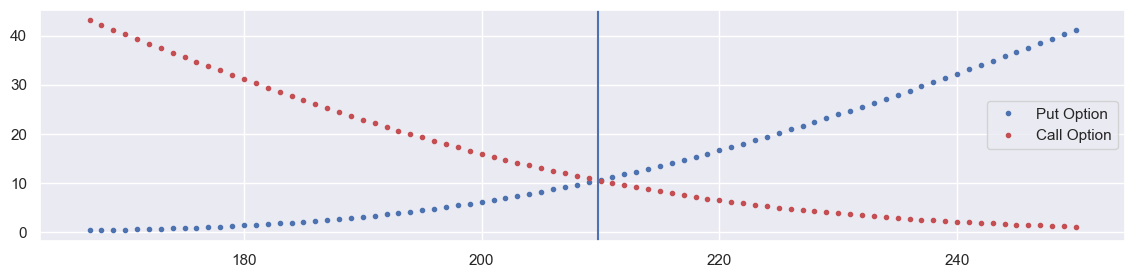

In [471]:
d1 = (np.log(S0 / K) + (r + 0.5*(v0**2)) * T) / (v0 * np.sqrt(T))
d2 = d1 - (v0 * np.sqrt(T))
CALL_BS = (S0 * norm.cdf(d1)) - (K * np.exp(-r*T) * norm.cdf(d2))
PUT_BS = (K * np.exp(-r*T) * norm.cdf(-d2)) - (S0 * norm.cdf(-d1))

plt.figure(figsize=(14, 3))
plt.plot(K, PUT_BS, "b.", label='Put Option')
plt.plot(K, CALL_BS, "r.", label='Call Option')
plt.axvline(x = S0)
plt.legend()
plt.show()

## Parameter Calibration
### Manually

To estimate the parameters of the Heston model, we define the loss functions, which use the error between quoted market prices and model prices, or between market and model implied volatilities. The parameter estimates are those values which minimize the value of the loss function, so that the model prices or implied volatilities are as close as possible to their market counterparts. A constrained minimization algorithm must be used in this regard so that the constraints on the parameters
$$ \kappa > 0, \theta > 0, \sigma > 0, v_0 > 0, \rho \in [-1, +1]$$

The following is the implementation of the branch minimizing the error with regard to the market price of the options.

In [317]:
data_raw = pd.read_csv('Heston_data.csv')
data_raw['r'] = 0.0
data_raw['maturity_date'] = pd.to_datetime(data_raw['maturity_date'], format='%Y/%m/%d').dt.strftime('%Y-%m-%d')
data_raw['current_date'] = pd.to_datetime(data_raw['current_date'], format='%Y/%m/%d').dt.strftime('%Y-%m-%d')
parity_data = data_raw.copy()
parity_data['q'] = 0.0
parity_data

,close,code,contract_type,K,contract_unit,...,temp,rf,maturity_date,current_date,q
0,0.0054,10004368.XSHG,PO,3.9,10000,...,-0.000142,-0.002733,2022-08-24,2022-08-05,0.0
1,0.0119,10004369.XSHG,PO,4.0,10000,...,-0.000142,-0.002733,2022-08-24,2022-08-05,0.0
2,0.0278,10004370.XSHG,PO,4.1,10000,...,-0.000142,-0.002733,2022-08-24,2022-08-05,0.0
3,0.0577,10004371.XSHG,PO,4.2,10000,...,-0.000142,-0.002733,2022-08-24,2022-08-05,0.0
4,0.0023,10004442.XSHG,PO,3.8,10000,...,-0.000142,-0.002733,2022-08-24,2022-08-05,0.0
...,...,...,...,...,...,...,...,...,...,...,...
52,0.2190,10004427.XSHG,CO,4.3,10000,...,-0.005182,-0.008259,2023-03-22,2022-08-05,0.0
53,0.1802,10004428.XSHG,CO,4.4,10000,...,-0.005182,-0.008259,2023-03-22,2022-08-05,0.0
54,0.1492,10004429.XSHG,CO,4.5,10000,...,-0.005182,-0.008259,2023-03-22,2022-08-05,0.0
55,0.1200,10004430.XSHG,CO,4.6,10000,...,-0.005182,-0.008259,2023-03-22,2022-08-05,0.0


We prepare two types of pricing functions for modeling options prices, the COS method and the solution proposed by Lewis.

In [318]:
def pricing(L, T, v0, theta, kappa, rho, sigma, K, S0, r, q):# For Call Options
    K = np.array([K])
    mu = r - q
    k = np.arange(np.power(2, N))
    a, b = truncate_range(L, mu, T, v0, theta, kappa, rho, sigma)
    bma = b - a
    UkPut  = 2 / bma * ( psi(a,b,a,0,k) - chi(a,b,a,0,k) )
    UkCall = 2 / bma * ( chi(a,b,0,b,k) - psi(a,b,0,b,k) )
    char_functions = get_COS_char(k, rho, sigma, kappa, mu, T, v0, a, b)
    
    CALL_COS = np.zeros((np.size(K)))
    PUT_COS = np.zeros((np.size(K)))
    CALL_COS_PARITY = np.zeros((np.size(K)))

    for num in range(0, np.size(K)): # Looping over the array of log-strike
        x  = np.log(S0 / K[num])
        exp_term = np.exp(1j * k * np.pi * (x-a)/(a-b))
        F_k = np.real(char_functions * exp_term)
        F_k[0] *= 0.5					
        CALL_COS[num] = K[num] * (np.sum(np.multiply(F_k, UkCall))).real * np.exp(-r * T)
        PUT_COS[num] = K[num] * (np.sum(np.multiply(F_k, UkPut))).real * np.exp(-r * T)
        CALL_COS_PARITY[num] = PUT_COS[num] + S0 * np.exp(-q * T) - K[num] * np.exp(-r * T)
    return CALL_COS, PUT_COS

In [319]:
def pricing_lewi(S0, r, q, K, T, v0, kappa, theta, rho, sigma): 
    def char_function(phi):
        i = complex(0, 1)
        rspi = rho*sigma*phi*i  
        d = np.sqrt( (rspi-kappa)**2 + sigma**2 * (phi*i+ phi**2) )
        g = (kappa - rspi + d)/(kappa - rspi - d)
        C = kappa * theta/sigma**2 * ((kappa-rspi+d)*T -2*np.log((1-g*np.exp(d*T))/(1-g)))
        D = (kappa-rspi+d)/sigma**2 * ( (1-np.exp(d*T))/(1-g*np.exp(d*T)) )
        func = np.exp(C + D*v0)
        return func
    
    def rect_integral(func,lower = 0,upper = 100,N = 1000):  # Rectangular Integration
        k = np.log(S0/K)+(r-q)*T
        result = 0
        dx = (upper-lower)/N
        for j in range(0,N):
            phi = lower + dx * (2*j + 1)/2
            func_value = np.exp(i*phi*k)*func(phi-0.5*i)/(phi**2+1/4)
            result = result + func_value * dx
        return result
    
    real_integral = np.real(rect_integral(char_function))

    call = np.exp(-q*T) * S0 - np.sqrt(S0*K)*np.exp(-(r+q)*T/2)/np.pi*real_integral
    put_parity = call - (S0*np.exp(-q*T)) + K*np.exp(-r*T)

    return call, put_parity

The transformation formula used below ensures that a certain parameter is smoothly transformed to stay within the interval [l, u], which helps in dealing with optimization constraints. It stabilizes the optimization by keeping the parameters within their respective bounds.

In [320]:
def transform(y,l,u):
    return 0.5*( (u+l)+(u-l)*np.tanh(y) )

In [220]:
def obj_func(params):
    fit_option = parity_data
    v0, kappa, theta, rho, sigma = params
    v0 = transform(v0, 0, 1)
    kappa = transform(kappa, 0, 10)
    theta = transform(theta, 0, 1)
    rho = transform(rho, -1, 1)
    sigma = transform(sigma, 0, 1)
    total_error = []
    for index, row in fit_option.iterrows():
        S0 = row['S']
        r = row['r']
        q = row['q']
        K = row['K']
        T = row['ttm']
        option_value = row['close']
        contract_type = row['contract_type']
        if contract_type == 'PO':
            #model_price = pricing(L, T, v0, theta, kappa, rho, sigma, K, S0, r, q)[1]
            model_price = pricing_lewi(S0, r, q, K, T, v0, kappa, theta, rho, sigma)[1]
        elif contract_type == 'CO':
            #model_price = pricing(L, T, v0, theta, kappa, rho, sigma, K, S0, r, q)[0]
            model_price = pricing_lewi(S0, r, q, K, T, v0, kappa, theta, rho, sigma)[0]
        error = model_price - option_value
        total_error.append(error)
    return np.array(total_error).flatten()


def fit():
    init_point = (-2,-0.5,-2,-0.5,-2)
    result =  least_squares(fun=obj_func, x0=init_point, 
                       method="lm")
    
    v0, kappa, theta, rho, sigma = result.x
    v0, kappa, theta, rho, sigma = transform(v0, 0, 1), transform(kappa, 0, 10), \
    transform(theta, 0, 1), transform(rho, -1, 1), transform(sigma, 0, 1)
    opt_paras["v0"], opt_paras["kappa"], opt_paras["theta"], opt_paras["rho"], opt_paras["sigma"] = v0, kappa, \
    theta, rho, sigma
    return opt_paras

In [221]:
opt_paras = {"v0":0.02,"kappa":2,"theta":0.02,"rho":-0.5,"sigma":0.02}
opt_paras = fit()
output_df = pd.DataFrame({
    'current_date' : [parity_data['current_date'][0]],
    'Risk_free_rate' : [parity_data['r'][0]],
    'Spot' : parity_data['S'][0],
    'Theta' : opt_paras['theta'],
    'Kappa' : opt_paras['kappa'],
    'Sigma' : opt_paras['sigma'],
    'Rho' : opt_paras['rho'],
    'V0' : opt_paras['v0']})
output_df

,current_date,Risk_free_rate,Spot,Theta,Kappa,Sigma,Rho,V0
0,2022-08-05,0.0,4.218,0.047212,7.402905,0.995792,-0.245548,0.034085


In [215]:
predict_price = []
for index, row in parity_data.iterrows():
    v0, kappa, theta, rho, sigma = list(opt_paras.values())
    S0 = row['S']
    r = row['r']
    q = row['q']
    K = row['K']
    T = row['ttm']
    option_value = row['close']
    contract_type = row['contract_type']
    if contract_type == 'PO':
        model_price = pricing_lewi(S0, r, q, K, T, v0, kappa, theta, rho, sigma)[1]
    else:
        model_price = pricing_lewi(S0, r, q, K, T, v0, kappa, theta, rho, sigma)[0]
    predict_price.append(model_price)
appended_data = parity_data.copy()
appended_data['Heston_price_Manual'] = predict_price
appended_data[['close','code','contract_type','Heston_price_Manual']]

,close,code,contract_type,Heston_price_Manual
0,0.0054,10004368.XSHG,PO,0.000349
1,0.0119,10004369.XSHG,PO,0.002862
2,0.0278,10004370.XSHG,PO,0.014108
3,0.0577,10004371.XSHG,PO,0.045679
4,0.0023,10004442.XSHG,PO,0.000026
...,...,...,...,...
52,0.2190,10004427.XSHG,CO,0.151576
53,0.1802,10004428.XSHG,CO,0.114188
54,0.1492,10004429.XSHG,CO,0.084234
55,0.1200,10004430.XSHG,CO,0.060845


### Automatically
Alternatively, we conduct the parameter calibration with Python package QuantLib to make more accurate pricing simulation

In [535]:
import QuantLib as ql
from scipy.optimize import differential_evolution
from scipy.optimize import NonlinearConstraint, Bounds

The Feller condition ensures the volatility keeps positive as
$$ 2\kappa\theta - \sigma^2 >0$$

In [536]:
def constr_f(x):
    return np.array(2*x[0] * x[1] - x[2]**2)

The first function helps set up the Heston model for calibration,
the second function helps process input option information.

In [537]:
def setup_model(_yield_ts, _dividend_ts, _spot, init_condition=(0.02, 0.2, 0.5, 0, 0.01)):
    calendar = ql.China(ql.China.SSE)
    theta, kappa, sigma, rho, v0 = init_condition
    process = ql.HestonProcess(_yield_ts, _dividend_ts,
                               ql.QuoteHandle(ql.SimpleQuote(_spot)),
                               v0, kappa, theta, sigma, rho)
    model = ql.HestonModel(process)
    engine = ql.AnalyticHestonEngine(model)
    return model, engine


def setup_helpers(engine, option_df, ref_date, spot, yield_ts, dividend_ts):
    calendar = ql.China(ql.China.SSE)
    heston_helpers = []
    grid_data = []
    for i in range(len(option_df)):
        t = (ql.DateParser.parseFormatted(option_df["maturity_date"][i], '%Y-%m-%d') - ref_date)
        spot = option_df["fut"][i] # Forward Spot Price
        p = ql.Period(t, ql.Days)
        volatility = option_df["sigma"][i]
        helper = ql.HestonModelHelper(
            p, calendar, spot, option_df["K"][i] \
            , ql.QuoteHandle(ql.SimpleQuote(volatility)),
            yield_ts, dividend_ts)
        helper.setPricingEngine(engine)
        heston_helpers.append(helper)
        grid_data.append((ql.DateParser.parseFormatted(option_df["maturity_date"][i], '%Y-%m-%d') \
                              , option_df["K"][i]))
    return heston_helpers, grid_data

In [538]:
def loss_function_generator(model, helpers, norm=True):
    def loss_function(params):
        params_ = ql.Array(list(params))
        model.setParams(params_)
        error = [h.calibrationError() for h in helpers]
        if norm:
            return np.sum(np.abs(error))
        else:
            return error

    return loss_function


def calibration_report(helpers, grid_data):
    avg = 0.0
    for i, opt in enumerate(helpers):
        err = (opt.modelValue() - opt.marketValue())
        date, strike = grid_data[i]
        avg += 0.5*err**2
    avg = avg * 100.0 / len(helpers)
    summary = "Square Error (%%) : %5.9f" % (avg)
    return avg

In [539]:
def get_Hestonpara(dataframe):
    day_count = ql.Actual365Fixed()
    calendar = ql.China(ql.China.SSE)
    aotmdata0 = dataframe
    # set Heston Condition
    calculation_date = ql.DateParser.parseFormatted(aotmdata0["current_date"][0], '%Y-%m-%d')
    spot = aotmdata0["S"][0]
    ql.Settings.instance().evaluationDate = calculation_date

    risk_free_rate = aotmdata0["r"].iloc[0]
    dividend_rate = 0.0

    # build term structure
    yield_ts = ql.YieldTermStructureHandle(ql.FlatForward(calculation_date, risk_free_rate, day_count))
    dividend_ts = ql.YieldTermStructureHandle(ql.FlatForward(calculation_date, dividend_rate, day_count))

    # get calibration result summary
    summary = []
    modelDE, engineDE = setup_model(yield_ts, dividend_ts, spot)
    heston_helpersDE, grid_dataDE = setup_helpers(engineDE, aotmdata0, calculation_date, spot, yield_ts, dividend_ts)
    initial_condition = list(modelDE.params())

    # set heston parameter bounds
    bounds = [(0.001, 1.0), (0.1, 25.0), (0.01, 4), (-1.0, 1.0), (0.001, 1.0)]
    loss_function = loss_function_generator(modelDE, heston_helpersDE, norm=True)

    # use diffirential_evolution
    sol = differential_evolution(loss_function, bounds, maxiter=5000, seed=1)
    theta, kappa, sigma, rho, v0 = modelDE.params()
    error = calibration_report(heston_helpersDE, grid_dataDE)
    summary.append([aotmdata0["current_date"][0], error, risk_free_rate, spot] + list(modelDE.params()))
    result_df = pd.DataFrame(summary,
                             columns=['current_date', 'Error', 'Risk_free_rate', 'Spot', 'Theta', 'Kappa', 'Sigma',
                                      'Rho', 'V0'])
    return result_df, theta, kappa, sigma, rho, v0

In [540]:
result_df = get_Hestonpara(parity_data)[0]
result_df

,current_date,Error,Risk_free_rate,Spot,Theta,Kappa,Sigma,Rho,V0
0,2022-08-05,0.001095,0.0,4.218,0.047748,16.095907,2.932648,-0.141389,0.029173


In [691]:
predict_price_quantlib = []
theta, kappa, sigma, rho, v0 = get_Hestonpara(parity_data)[1:]
for index, row in appended_data.iterrows():
    S0 = row['S']
    r = row['r']
    q = row['q']
    K = row['K']
    T = row['ttm']
    option_value = row['close']
    contract_type = row['contract_type']
    if contract_type == 'PO':
        model_price = pricing_lewi(S0, r, q, K, T, v0, kappa, theta, rho, sigma)[1]
    else:
        model_price = pricing_lewi(S0, r, q, K, T, v0, kappa, theta, rho, sigma)[0]
    predict_price_quantlib.append(model_price)
appended_data['Heston_price_QuantLib'] = predict_price_quantlib
appended_data[['close','code','contract_type','Heston_price_Manual', 'Heston_price_QuantLib']]

,close,code,contract_type,Heston_price_Manual,Heston_price_QuantLib
0,0.0054,10004368.XSHG,PO,0.000349,0.006653
1,0.0119,10004369.XSHG,PO,0.002862,0.012847
2,0.0278,10004370.XSHG,PO,0.014108,0.024157
3,0.0577,10004371.XSHG,PO,0.045679,0.051760
4,0.0023,10004442.XSHG,PO,0.000026,0.003844
...,...,...,...,...,...
52,0.2190,10004427.XSHG,CO,0.151576,0.221545
53,0.1802,10004428.XSHG,CO,0.114188,0.181811
54,0.1492,10004429.XSHG,CO,0.084234,0.148648
55,0.1200,10004430.XSHG,CO,0.060845,0.121361


Comparing the total error produced by two calibration method

In [689]:
print(np.sum((appended_data['Heston_price_Manual'] - appended_data['close'])**2),
      np.sum((appended_data['Heston_price_QuantLib'] - appended_data['close'])**2))

0.08739360411638022 0.0016178270763851275


## Delta Hedging Simulation

### Asset Price Path Simulation with Monte Carlo

In [693]:
result_df

,current_date,Error,Risk_free_rate,Spot,Theta,Kappa,Sigma,Rho,V0
0,2022-08-05,0.001095,0.0,4.218,0.047748,16.095907,2.932648,-0.141389,0.029173


In [752]:
parity_data.sort_values(by='ttm', inplace=True)
option = pd.DataFrame([parity_data.iloc[-1]])
option

,close,code,contract_type,K,contract_unit,...,temp,rf,maturity_date,current_date,q
56,0.0967,10004431.XSHG,CO,4.7,10000,...,-0.005182,-0.008259,2023-03-22,2022-08-05,0.0


In [770]:
def heston_simulation(n_paths=500, S0=4.218, r=0.00104, q=0, K=3.9, T=0.627397, v0=0.029173,
                      kappa=16.095907, theta=0.047748, rho=-0.141389, sigma=1.02288):
    np.random.seed(1)
    steps = int(252 * 12 * T)
    
    corr_mat = np.zeros((2,2))
    corr_mat[0,:] = [1.0,rho]
    corr_mat[1,:] = [rho,1.0]
    cho_mat=np.linalg.cholesky(corr_mat)

    delta_t = float(T)/steps
    Spath = np.zeros((steps + 1, n_paths))
    Vpath = np.zeros((steps + 1, n_paths))
    Spath[0] = S0
    Vpath[0] = v0

    for t in range(1, steps + 1):
        z_u = np.random.standard_normal((2, n_paths))
        z_r = np.dot(cho_mat, z_u)
        temp_v = (Vpath[t-1, 0:n_paths] + kappa*(theta-np.maximum(Vpath[t-1,0:n_paths],0.0)) * delta_t
                  + sigma * np.sqrt(np.maximum(Vpath[t-1,0:n_paths],0.0))*np.sqrt(delta_t) * z_r[0])
        Vpath[t, 0:n_paths] = np.maximum(temp_v,0.0)
        temp_s = Spath[t-1, 0:n_paths] + r * S0 * delta_t + np.sqrt(Vpath[t, 0:n_paths]) * S0 * np.sqrt(delta_t) * z_r[1]
        Spath[t, 0:n_paths] = np.maximum(temp_s,0.0)
    return Spath, Vpath

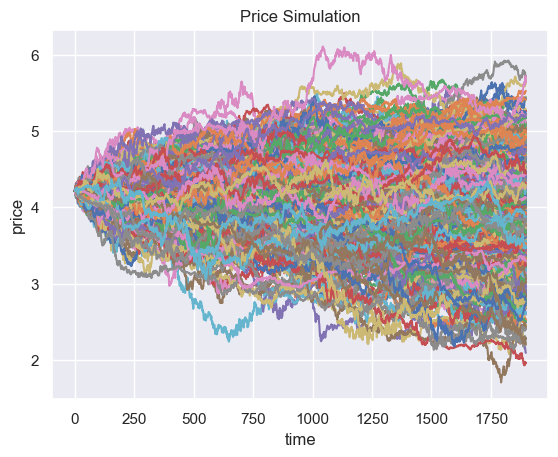

In [771]:
Spath, Vpath = heston_simulation()
plt.plot(Spath[:, :])
plt.xlabel('time')
plt.ylabel('price')
plt.title('Price Simulation')
plt.grid(True)
plt.show()

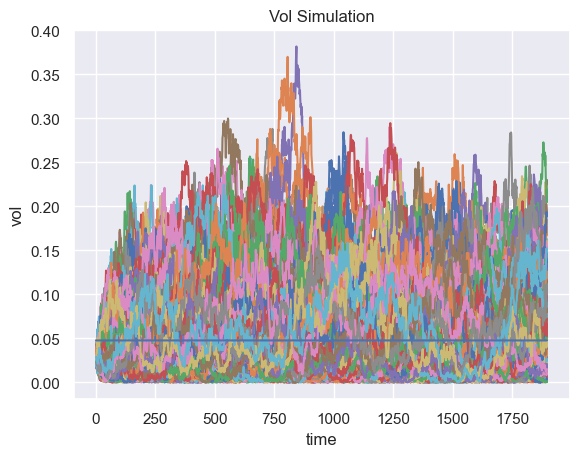

In [773]:
plt.plot(Vpath[:, :])
plt.plot([theta]*len(Spath))
plt.xlabel('time')
plt.ylabel('vol')
plt.title('Vol Simulation')
plt.grid(True)
plt.show()

In [ ]:
plt.plot(Spath[:, :])
    plt.xlabel('time')
    plt.ylabel('price')
    plt.title('Price Simulation')
    plt.grid(True)
    plt.show()

In [713]:
S_path, V_path, value = heston_simulation(50, 10000, S0=4.218, r=0, q=0, K=3.9, T=0.052055, 
                                          v0=0.029173,kappa=16.095907, theta=0.047748, rho=-0.141389, 
                                          sigma=2.932648)

### Hedging Simulator

We first present the theoretical framework for the delta hedging. Delta is the sensitive measurement of the options price with respect to the underlying asset. Normally, we assume the uncertainty in this case is the stochastic process of the asset.

The portfolio is then constructed as
$$\Pi_{t} = -V_t + \omega S_t$$
$$d\Pi_t = -dV_t + \omega dS_t + r(\omega S_t - V_t)dt$$

Following the no-arbitrage argument, we can rewrite it as
$$dS_t(\omega - \frac{\partial V}{\partial S_t}) - (\frac{\partial V}{\partial t}dt + \frac{1}{2}\frac{\partial^2 V}{\partial S_t^2}) - r(\omega S_t - V_t)dt$$

The optimal, theoretical variance-minimizing hedge ratio(Delta) is thus
$$\omega^{*} = \frac{\partial V}{\partial S_t} + \frac{\rho \sigma}{S_t}\frac{\partial V}{\partial v_t}$$

In [716]:
def omega(S, r, q, K, T, t, kappa, theta, sigma, rho, v0):
    # Delta
    dS = 1e-16
    dv = 1e-16
    price_plus = pricing_lewi(S + dS, r, q, K, T-t, v0, kappa, theta, rho, sigma)[0]
    price_minus = pricing_lewi(S - dS, r, q, K, T-t, v0, kappa, theta, rho, sigma)[0]
    delta_S_value = (price_plus - price_minus) / (2 * dS)

    price_plus = pricing_lewi(S, r, q, K, T-t, v0 + dv, kappa, theta, rho, sigma)[0]
    price_minus = pricing_lewi(S, r, q, K, T-t, v0 - dv, kappa, theta, rho, sigma)[0]   
    vega_v_value = (price_plus - price_minus) / (2 * dv)

    omega = delta_S_value + (rho * sigma / S) * vega_v_value
    return omega

In [749]:
def hedging_simulation(n_paths, S0=4.218, r=0, q=0, K=4.7, T=0.627397):
    mu = r - q
    v0=0.029173
    kappa=16.095907
    theta=0.047748
    rho=-0.141389
    sigma=2.932648
    steps = int(252 * 12 * T)
    dt = float(T)/steps
    
    corr_mat = np.zeros((2,2))
    corr_mat[0,:] = [1.0, rho]
    corr_mat[1,:] = [rho, 1.0]
    cho_mat=np.linalg.cholesky(corr_mat)

    Spath = np.zeros((steps + 1, n_paths))
    Vpath = np.zeros((steps + 1, n_paths))
    Spath[0] = S0
    Vpath[0] = v0
    
    C0 = pricing_lewi(S0, r, q, K, T, v0, kappa, theta, rho, sigma)[0]
    PnL = np.zeros(n_paths)
    PnL_rel = np.zeros(n_paths)

    for t in range(1, steps + 1):
        z_u = np.random.standard_normal((2, n_paths))
        z_r = np.dot(cho_mat, z_u)
        temp_v = (Vpath[t-1, 0:n_paths] + kappa*(theta-np.maximum(Vpath[t-1,0:n_paths],0.0)) * delta_t
                  + sigma * np.sqrt(np.maximum(Vpath[t-1,0:n_paths],0.0))*np.sqrt(delta_t) * z_r[0])
        Vpath[t, 0:n_paths] = np.maximum(temp_v,0.0)
        temp_s = Spath[t-1, 0:n_paths] + r * S0 * delta_t + np.sqrt(Vpath[t, 0:n_paths]) * S0 * np.sqrt(delta_t) * z_r[1]
        Spath[t, 0:n_paths] = np.maximum(temp_s,0.0)


    
    for n in tqdm(range(n_paths)):
        
        X = C0 # Initial Value of Option Prices (C0 at t=0)
        S = S0 # Initial Value of Underlying Asset
        v = v0 # Initial Volatility
        print(X, S-K)
        for t in range(1, steps + 1): 
            # Amount of Underlying Asset
            Delta = omega(S, r, q, K, T, step*dt, kappa, theta, sigma, rho, v0)
            RF = X - Delta*S # Risk-Free Asset for Hedging
            
            # Price Changes with delta_t
            z1 = norm.rvs(size=1)
            z2 = norm.rvs(size=1)
            dW1 = z1 * np.sqrt(dt)
            dW2 = rho * z1 * np.sqrt(dt) + np.sqrt(1 - rho**2) * z2 * np.sqrt(dt)

            new_v = ((np.sqrt(v) + sigma/2 * np.sqrt(dt)*dW1)**2 
                     + kappa*(theta - v)*dt 
                     - 0.25*sigma**2*dt)
            v = np.abs(new_v)
            new_S = S * np.exp((mu - 0.5*v)*dt + np.sqrt(v)*dt*dW2)
            S = new_S
            
            X_new = Delta * S + RF * np.exp(r * dt)
            X = X_new
        # Profit & Loss
        PnL[n] = X - max(S - K, 0)
        # Relative PnL
        PnL_rel = PnL/C0
    return PnL_rel

In [750]:
steps = int(T * 252)
PnL_rel = hedging_simulation(1, steps)

  0%|                                                     | 0/1 [00:00<?, ?it/s]

0.09913790208463258 -0.4820000000000002


100%|█████████████████████████████████████████████| 1/1 [00:03<00:00,  3.74s/it]


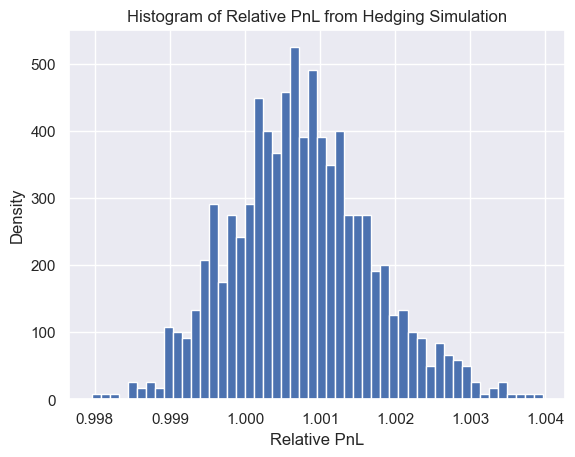

In [746]:
num_bins = 50
plt.hist(PnL_rel, num_bins, density=True, label='Relative PnL Distribution')
plt.xlabel('Relative PnL')
plt.ylabel('Density')
plt.title('Histogram of Relative PnL from Hedging Simulation')
plt.show()

In [747]:
sorted_PnL = np.sort(PnL_rel)
sorted_PnL = pd.DataFrame(sorted_PnL).dropna()
sorted_PnL.mean()

0    1.000753
dtype: float64

In [748]:
confidence_level = 0.95
var_index = int((1 - confidence_level) * len(sorted_PnL))
VaR_95 = sorted_PnL.iloc[7]
VaR_95

0    0.998639
Name: 7, dtype: float64